# House-Price Prediction

# About Data

### **Dataset Overview**
The dataset represents housing-related data for various blocks, potentially useful for predicting housing prices, analyzing patterns, and studying demographic trends. It contains **20,640 rows** and **10 columns** of mixed data types (numerical and categorical).

### **Column Descriptions**  
1. **longitude** *(float)*  
   - Longitude coordinate of the housing block.  
   - Continuous data, likely used to map geographical location.  
   - Range: Negative values representing locations west of the prime meridian.

2. **latitude** *(float)*  
   - Latitude coordinate of the housing block.  
   - Continuous data, likely used to map geographical location.  
   - Range: Positive values representing locations north of the equator.  

3. **housing_median_age** *(int)*  
   - Median age of the houses in the block.  
   - Integer data. Provides insights into housing stock age.  
   - Range: Likely includes values like decades or approximate years.

4. **total_rooms** *(int)*  
   - Total number of rooms in the block.  
   - Integer data, giving an aggregate measure of housing scale.  
   - Potentially affected by outliers (e.g., very high counts).  

5. **total_bedrooms** *(float)*  
   - Total number of bedrooms in the block.  
   - Float data, but some values are **missing** (20,433 out of 20,640 non-null).  
   - Needs imputation or removal of rows/columns with missing data.

6. **population** *(int)*  
   - Total population of the block.  
   - Integer data, reflecting the density or scale of neighborhoods.  

7. **households** *(int)*  
   - Total number of households in the block.  
   - Integer data, correlates closely with population and housing data.  

8. **median_income** *(float)*  
   - Median income of households in the block, expressed in tens of thousands of dollars.  
   - Continuous data. Likely scaled or rounded for easier interpretation.  

9. **ocean_proximity** *(object)*  
   - Categorical variable describing the proximity to the ocean.  
   - Example categories might include:  
     - "NEAR OCEAN"  
     - "INLAND"  
     - "NEAR BAY"  
     - "ISLAND"  
   - Provides a geographical perspective that may impact house prices.

10. **median_house_value** *(int)*  
    - Target variable. Median house value in the block (e.g., in USD).  
    - Integer data, used for regression tasks or pricing predictions.  
    - May need scaling or binning based on use case.

### **Key Observations**
- **Data Completeness**: All columns except `total_bedrooms` are complete.  
- **Numerical vs. Categorical**:  
  - **Numerical**: 8 columns (latitude, longitude, housing_median_age, etc.).  
  - **Categorical**: 1 column (`ocean_proximity`).  
- **Missing Data**: The `total_bedrooms` column has missing values (207 entries). Imputation may be necessary.  
- **Outliers**: Columns like `total_rooms`, `population`, and `median_house_value` may have outliers that can skew analysis.  

### **Possible Use Cases**
1. **Regression Analysis**: Predict house prices (`median_house_value`) based on features like income, location, or room count.  
2. **Exploratory Data Analysis (EDA)**: Investigate relationships between variables like population density and median house value.  
3. **Clustering**: Segment regions based on proximity, population, or income for urban planning.  
4. **Geospatial Analysis**: Map housing trends using `longitude` and `latitude`.


# Understanding Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


df = pd.read_csv("/content/House-Price.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


# Data Cleaning

### Replace NULL Values

**The null values are as little as 1% of our dataset. We could delete it without having a problem but I am going to replace them with the mean value of the column itself**

In [ ]:
# Finding the mean of the column having NaN
mean_value = df['total_bedrooms'].mean()

# Replace NaNs in column total_bedrooms with the mean of values in the same column
df['total_bedrooms']=df['total_bedrooms'].fillna(value=mean_value)

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


There is only one data to encode 'ocean_proximity' left data are interger or numerical form

In [ ]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])

In [ ]:
df['ocean_proximity'].unique()

array([3, 0, 1, 4, 2])

# Data Visulation

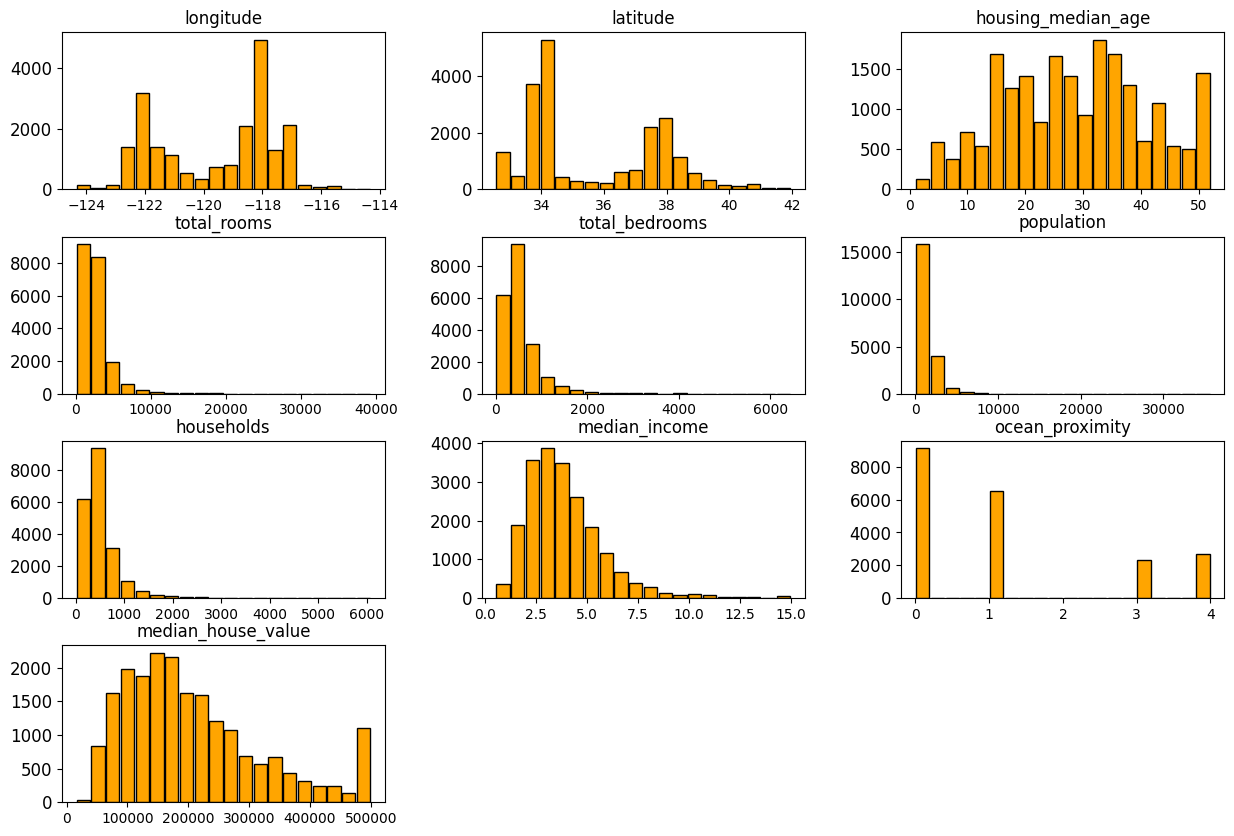

In [ ]:
ax = df.hist(figsize=(15,10),grid=False, # Remove grid
                        xlabelsize=10, # Change size of labels on the x-axis
                        ylabelsize=12, # Change size of labels on the y-axis
                        bins=20, # Number of bins
                        edgecolor='black', # Color of the border
                        color='orange', # Color of the bins
                        rwidth=0.9 # Space between bins
                        )

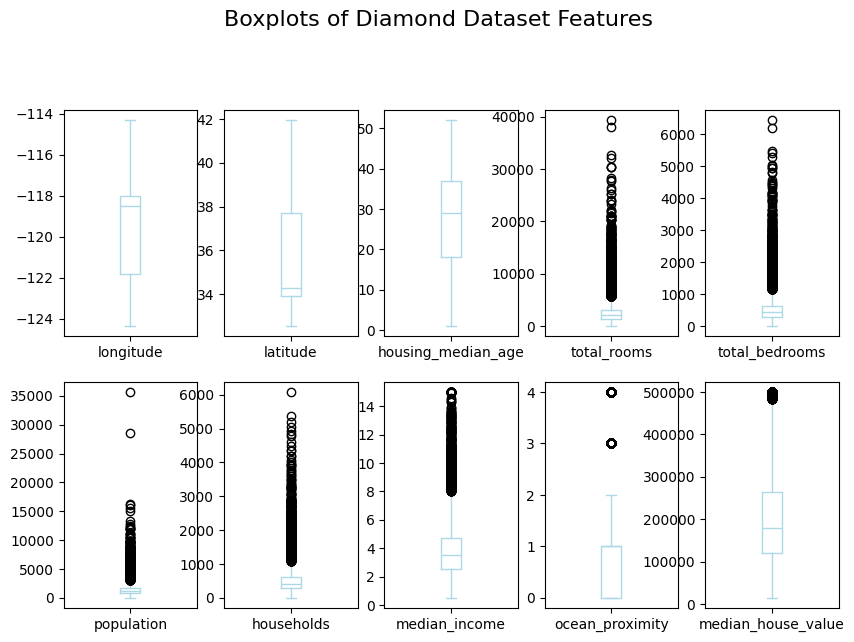

In [ ]:
df.plot(kind='box', subplots=True, layout=(3,5), figsize=(10,10),
color='lightblue')
plt.suptitle('Boxplots of Diamond Dataset Features', fontsize=16)
plt.show()

# Correlation Analysis

We had converted string feature into numeric

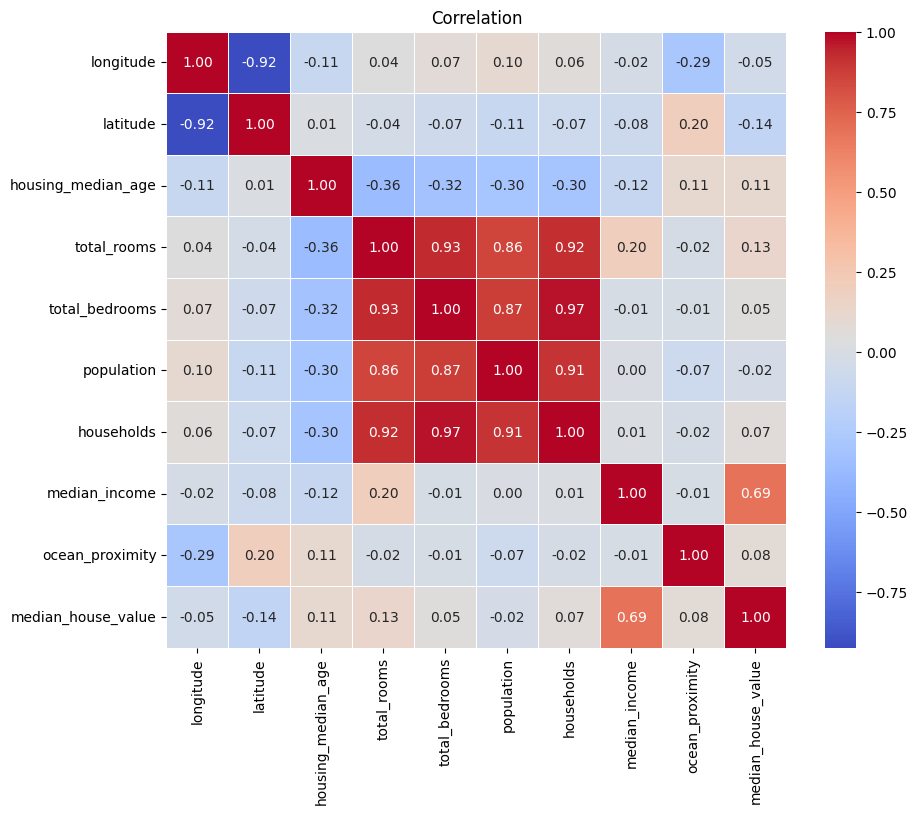

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation')

plt.show()

## PCA

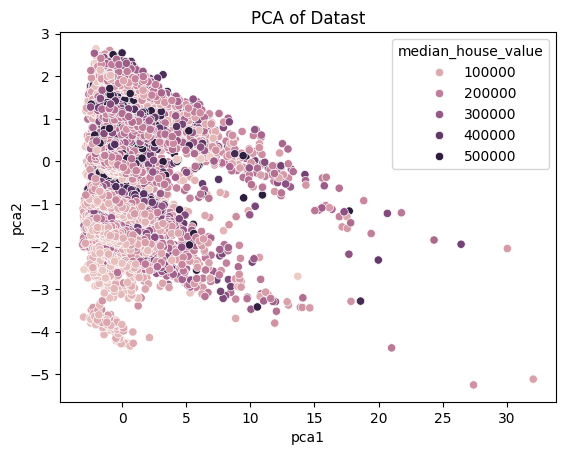

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = StandardScaler().fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Add PCA results to the DataFrame
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Visualize PCA results
sns.scatterplot(x='pca1', y='pca2', hue='median_house_value', data=df)
plt.title('PCA of Datast')
plt.show()

## Standard Scalar

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardization (mean = 0, std = 1)
scaler = StandardScaler()
df[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity']] = scaler.fit_transform(df[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity']])

# Initial Modeleling and Testing

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,pca1,pca2
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600,-2.033117,-1.401935
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500,2.952565,-2.091951
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100,-1.954361,-1.576654
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300,-1.917393,-1.667495
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200,-1.785230,-1.773259
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,1,78100,-1.119253,-1.703992
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,1,77100,-1.929342,-1.552882
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1,92300,-0.515602,-1.767950
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,1,84700,-0.928796,-1.746288


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Importing the metrics (measurements) for linear regression algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor  # Multi-layer perceptron regressor (MLP)

In [ ]:
X = df.drop(['median_house_value'],axis=1)
y = df['median_house_value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=42)

In [ ]:
# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    # "Gradient Boosting": GradientBoostingRegressor(),
    # "K-Nearest Neighbors": KNeighborsRegressor(),
}

In [ ]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [ ]:
# Dictionary to store the results
results = {}

In [ ]:
# Apply each model and compute metrics
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.084e+12, tolerance: 2.207e+10
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                                MAE          RMSE        R²
Linear Regression      4.567637e-10  6.452273e-10  1.000000
Ridge Regression       2.326555e+03  3.188381e+03  0.999224
Lasso Regression       1.179964e+04  1.612286e+04  0.980163
ElasticNet Regression  6.213031e+04  8.110190e+04  0.498056
Decision Tree          4.237635e+04  6.599645e+04  0.667620
Random Forest          3.065751e+04  4.762297e+04  0.826928


### Comprehensive Conclusion

This exploratory data analysis (EDA) project investigates factors influencing house prices, leveraging various preprocessing and visualization techniques to uncover critical insights. Key highlights include:

1. **Data Overview and Preprocessing**:
   - The dataset was thoroughly examined for missing values, with a negligible percentage (<1%) being handled by imputing the mean, ensuring data integrity.
   - Categorical variables like `ocean_proximity` were converted into numerical values using Label Encoding, enabling seamless compatibility with machine learning models.
   - Feature scaling was applied using standardization, transforming variables into a consistent scale for accurate modeling.

2. **Key Visualizations and Insights**:
   - **Box Plots**: Highlighted distributions and outliers across various features, offering insights into variability and feature importance.
   - **Scatter Plots with PCA**: Dimensionality reduction revealed clustering patterns and relationships between house prices and other features like median income.
   - **Correlation Heatmap** (if applicable): Illustrated the strength of relationships among variables, emphasizing the impact of median income and ocean proximity on house prices.

3. **Feature Importance**:
   - Variables such as `median_income`, `housing_median_age`, `total_rooms`, and proximity to the ocean showed strong associations with house prices. These factors are critical for predictive modeling.
   - Outlier removal ensured the dataset accurately represented trends, mitigating biases that could distort predictions.

4. **Data Preparedness for Modeling**:
   - After preprocessing, the dataset is clean, scaled, and ready for predictive modeling. Key features and the target variable (`median_house_value`) have been thoroughly analyzed, creating a solid foundation for regression tasks.

5. **Future Directions**:
   - The next steps include training machine learning models, such as Linear Regression, Decision Trees, or Gradient Boosting, to predict house prices accurately.
   - Further work could focus on hyperparameter optimization, feature selection, and model evaluation using performance metrics like R², Mean Absolute Error, and Root Mean Squared Error.
   - Deploying the prediction model in a user-friendly tool could provide actionable insights for stakeholders like buyers, sellers, and real estate agents.

This project not only highlights the underlying trends in the dataset but also sets the stage for developing robust predictive models, paving the way for actionable insights and informed decision-making in the housing market.